In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('data/train.csv.gz', index_col='ID')
test = pd.read_csv('data/test.csv.gz', index_col='ID')

In [5]:
dlist = list()
for c in train.columns:
    if train[c].unique().shape[0] == 1:
        #print(c)
        dlist.append(c)
train.drop(dlist, axis=1, inplace=True)
test.drop(dlist, axis=1, inplace=True)

In [4]:
for cone in train.columns:
    for ctwo in train.columns:
        if cone not in train.columns:
            continue
        if ctwo not in train.columns:
            continue
        if cone != ctwo and np.all(train[cone] == train[ctwo]):
            #print(cone, ctwo)
            train.drop(ctwo, axis=1, inplace=True)
            test.drop(ctwo, axis=1, inplace=True)

In [7]:
target = train.TARGET.values.copy()
train.drop('TARGET', axis=1, inplace=True)

In [6]:
train.loc[:, 'var3'] += 1
train.loc[train['var3']==-999998, 'var3'] = 0

In [7]:
test.loc[:, 'var3'] += 1
test.loc[test['var3']==-999998, 'var3'] = 0

# imp_ent_var16_ult1

imp_ent_var16_ult1 float64 596 72301 (76020,)
3719 0.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


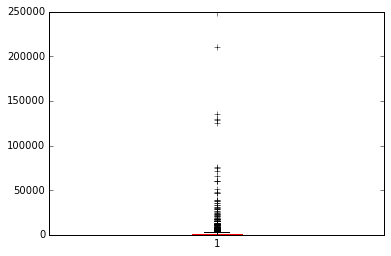

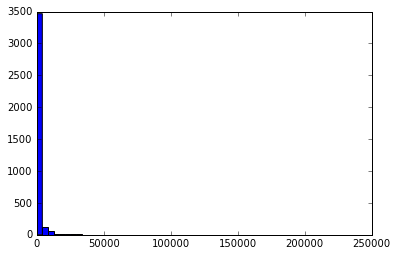

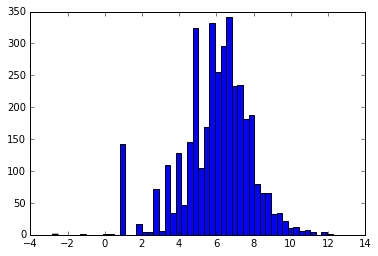

In [8]:
i = 2
print(train.columns[i], train.dtypes[i], 
      len(np.unique(train.ix[:, i])), np.sum(train.ix[:, i]==0),
      train.ix[:, i].shape)
ar = train.ix[train.ix[:, i] != 0, i]
print(len(ar), target[train.ix[:, i] != 0].mean())
plt.boxplot(ar.values)
plt.show()
plt.hist(ar.values, bins=50)
plt.show()
plt.hist(np.log(ar.values), bins=50);

In [8]:
fbinfeats = []
for i in range(len(train.columns)):
    #ar = train.loc[train.loc[:, c] != 0, c]
    if target[(train.ix[:, i] != 0).values].mean() == 0.0:
        fbinfeats.append(i)
    #elif train[c].dtype == 'int64' and target[(train.loc[:, c] != 0).values].mean() == 0.0:
    #    print(c, '\t', len(train[c].unique()))
    #print(len(ar), target[train.ix[:, i] != 0].mean())
print(len(fbinfeats))

108


In [9]:
train.columns.values[fbinfeats]

array(['ind_var6_0', 'ind_var6', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var20_0', 'ind_var20',
       'ind_var29_0', 'ind_var29', 'ind_var33_0', 'ind_var33',
       'ind_var34_0', 'ind_var34', 'num_var6_0', 'num_var6',
       'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18',
       'num_var20_0', 'num_var20', 'num_op_var40_hace3', 'num_var29_0',
       'num_var29', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34',
       'saldo_var6', 'saldo_var13_medio', 'saldo_var18', 'saldo_var20',
       'saldo_var29', 'saldo_var33', 'saldo_var34',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_aport_var33_1y3', 'delta_imp_reemb_var33_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3',
       'delta_imp_venta_var44_1y3', 'delta_num_aport_var33_1y3',
       'delta_num_reemb_var33_1y3', 'delta_num_trasp_v

In [11]:
for feat in fbinfeats:
    train.ix[:, feat] = (train.ix[:, feat] != 0).values.astype('int64')
    test.ix[:, feat] = (test.ix[:, feat] != 0).values.astype('int64')

In [12]:
import gc

11297

In [29]:
gc.collect()

52882

In [20]:
train.loc[:, 'imp_ent_var16_ult1'] = np.log((train.loc[:, 'imp_ent_var16_ult1']).values + 1)
test.loc[:, 'imp_ent_var16_ult1'] = np.log((test.loc[:, 'imp_ent_var16_ult1']).values + 1)

In [25]:
train.loc[:, 'imp_op_var39_comer_ult1'] = np.log((train.loc[:, 'imp_op_var39_comer_ult1']).values + 1)
test.loc[:, 'imp_op_var39_comer_ult1'] = np.log((test.loc[:, 'imp_op_var39_comer_ult1']).values + 1)

In [28]:
logvar = 'imp_op_var39_comer_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [31]:
logvar = 'imp_op_var40_comer_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [33]:
logvar = 'imp_op_var40_comer_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [35]:
logvar = 'imp_op_var40_efect_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [37]:
logvar = 'imp_op_var40_efect_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [39]:
logvar = 'imp_op_var40_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [42]:
logvar = 'imp_op_var41_comer_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [44]:
logvar = 'imp_op_var41_comer_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [46]:
logvar = 'imp_op_var41_efect_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [49]:
logvar = 'imp_op_var41_efect_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [51]:
logvar = 'imp_op_var41_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [53]:
logvar = 'imp_op_var39_efect_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [55]:
logvar = 'imp_op_var39_efect_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [57]:
logvar = 'imp_op_var39_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [59]:
logvar = 'imp_sal_var16_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [120]:
train.ix[:, 75] = (train.ix[:, 75] != 0).values.astype('int64')
test.ix[:, 75] = (test.ix[:, 75] != 0).values.astype('int64')

In [169]:
train.ix[:, 121] = (train.ix[:, 121] != 0).values.astype('int64')
test.ix[:, 121] = (test.ix[:, 121] != 0).values.astype('int64')

In [188]:
logvar = 'saldo_var1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [201]:
bilogvar = 'saldo_var5'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [206]:
bilogvar = 'saldo_var8'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [209]:
logvar = 'saldo_var12'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [211]:
logvar = 'saldo_var13_corto'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [213]:
logvar = 'saldo_var13_largo'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [216]:
logvar = 'saldo_var13'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [218]:
logvar = 'saldo_var14'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [220]:
logvar = 'saldo_var17'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [224]:
logvar = 'saldo_var24'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [226]:
logvar = 'saldo_var26'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [228]:
logvar = 'saldo_var25'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [230]:
bilogvar = 'saldo_var30'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [232]:
logvar = 'saldo_var31'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [234]:
logvar = 'saldo_var32'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [238]:
logvar = 'saldo_var37'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [240]:
logvar = 'saldo_var40'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [244]:
bilogvar = 'saldo_var42'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [246]:
logvar = 'saldo_var44'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [256]:
train.ix[:, 159] = (train.ix[:, 159] != 0).values.astype('int64')
test.ix[:, 159] = (test.ix[:, 159] != 0).values.astype('int64')

In [264]:
train.ix[:, 160] = (train.ix[:, 160] != 0).values.astype('int64')
test.ix[:, 160] = (test.ix[:, 160] != 0).values.astype('int64')

In [279]:
logvar = 'imp_aport_var13_hace3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [281]:
logvar = 'imp_aport_var13_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [284]:
logvar = 'imp_aport_var17_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [289]:
logvar = 'imp_var7_recib_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [292]:
logvar = 'imp_compra_var44_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [294]:
logvar = 'imp_reemb_var13_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [297]:
logvar = 'imp_reemb_var17_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [300]:
logvar = 'imp_var43_emit_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [302]:
logvar = 'imp_trans_var37_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [362]:
train.ix[:, 247] = (train.ix[:, 247] != 0).values.astype('int64')
test.ix[:, 247] = (test.ix[:, 247] != 0).values.astype('int64')

In [383]:
bilogvar = 'saldo_medio_var5_hace2'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [385]:
bilogvar = 'saldo_medio_var5_hace3'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [387]:
bilogvar = 'saldo_medio_var5_ult1'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [389]:
bilogvar = 'saldo_medio_var5_ult3'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [391]:
bilogvar = 'saldo_medio_var8_hace2'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [393]:
logvar = 'saldo_medio_var8_hace3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [395]:
bilogvar = 'saldo_medio_var8_ult1'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [397]:
bilogvar = 'saldo_medio_var8_ult3'
train.loc[train.loc[:, bilogvar] >= 0, bilogvar] = np.log((train.loc[train.loc[:, bilogvar]>=0, bilogvar]).values+1)
train.loc[train.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(train.loc[train[bilogvar] < 0, bilogvar])+1)
test.loc[test.loc[:, bilogvar] >= 0, bilogvar] = np.log((test.loc[test.loc[:, bilogvar]>=0, bilogvar]).values+1)
test.loc[test.loc[:, bilogvar] < 0, bilogvar] = -np.log(np.abs(test.loc[test[bilogvar] < 0, bilogvar])+1)

In [399]:
logvar = 'saldo_medio_var12_hace2'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [401]:
logvar = 'saldo_medio_var12_hace3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [403]:
logvar = 'saldo_medio_var12_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [405]:
logvar = 'saldo_medio_var12_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [407]:
logvar = 'saldo_medio_var13_corto_hace2'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [410]:
logvar = 'saldo_medio_var13_corto_hace3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [412]:
logvar = 'saldo_medio_var13_corto_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [414]:
logvar = 'saldo_medio_var13_corto_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [424]:
logvar = 'saldo_medio_var17_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [426]:
logvar = 'saldo_medio_var17_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [439]:
logvar = 'saldo_medio_var44_ult1'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [441]:
logvar = 'saldo_medio_var44_ult3'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [443]:
logvar = 'var38'
train.loc[:, logvar] = np.log((train.loc[:, logvar]).values + 1)
test.loc[:, logvar] = np.log((test.loc[:, logvar]).values + 1)

In [447]:
train.to_csv('proc_train.csv.gz', compression='gzip', index_label='ID')
test.to_csv('proc_test.csv.gz', compression='gzip', index_label='ID')

In [450]:
for cone in train.columns:
    for ctwo in train.columns:
        if cone not in train.columns:
            continue
        if ctwo not in train.columns:
            continue
        if cone != ctwo and np.all(train[cone] == train[ctwo]):
            #print(cone, ctwo)
            train.drop(ctwo, axis=1, inplace=True)
            test.drop(ctwo, axis=1, inplace=True)

In [451]:
train.to_csv('sm_proc_train.csv.gz', compression='gzip', index_label='ID')
test.to_csv('sm_proc_test.csv.gz', compression='gzip', index_label='ID')

305
name, type, uniques, zeros, shape
var38 float64 57736 0 (76020,)
var38 float64 57570 0 (75818,)
76020 0.0395685345962


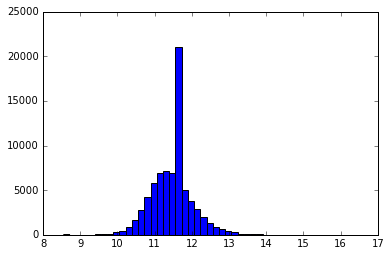

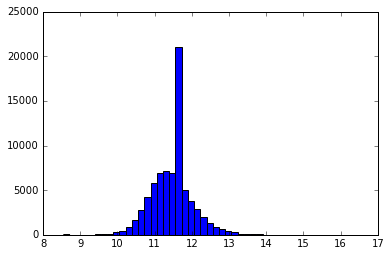

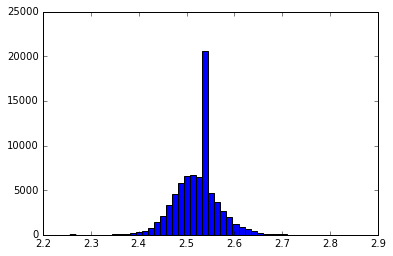

In [445]:
i = 305
if i in fbinfeats:
    print('no')
else:
    print(i)
    print('name, type, uniques, zeros, shape')
    print(train.columns[i], train.dtypes[i], 
          len(np.unique(train.ix[:, i])), np.sum(train.ix[:, i]==0),
          train.ix[:, i].shape)
    print(test.columns[i], test.dtypes[i], 
          len(np.unique(test.ix[:, i])), np.sum(test.ix[:, i]==0),
          test.ix[:, i].shape)
    if len(np.unique(train.ix[:, i])) < 20:
        print(np.unique(train.ix[:, i]))
        print(np.unique(test.ix[:, i]))
    ar = train.ix[:, i]
    print(len(ar), target[(train.ix[:, i] != 0).values].mean())
    #plt.boxplot(ar.values)
    #plt.show()
    plt.hist(ar.values, bins=50)
    plt.show()
    ar = train.ix[train.ix[:, i] != 0, i]
    plt.hist(ar.values, bins=50)
    plt.show()
    plt.hist(np.log(ar.values+1), bins=50);

In [262]:
train.ix[train.ix[:, 160] != 0 , 160]

ID
28139     9999999999
35792     9999999999
43146     9999999999
43652     9999999999
47275     9999999999
60545     9999999999
62476     9999999999
72708     9999999999
78611     9999999999
85925     9999999999
87103     9999999999
88235     9999999999
94662     9999999999
126559    9999999999
130976    9999999999
134467    9999999999
135988    9999999999
136916    9999999999
145776            -1
147718    9999999999
151792    9999999999
Name: delta_imp_reemb_var17_1y3, dtype: int64

In [263]:
target[(train.ix[:, 160] != 0).values]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
train.loc[train.loc[:, 'saldo_var5'] < 0, 'saldo_var5'].shape
target[(train.loc[:, 'saldo_var5'] < 0).values]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# not aligned categories
[69, 76, 77, 78, 84, 85, 86,
 87, 88, 92, 94, 95, 96, 98,
 99, 100, 101, 102, 103, 104,
 105, 106, 107, 110, 111, 
 116, 117, 118, 119, 123,
 124, 126, 206, 207, 208,
 214, 216, 217, ]
# aligned num but not cats
[70, 71, 81, 82, 108, 109,
 122, 210, ]